<a href="https://colab.research.google.com/github/edenbrln/Programs/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Sales.csv to Sales (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


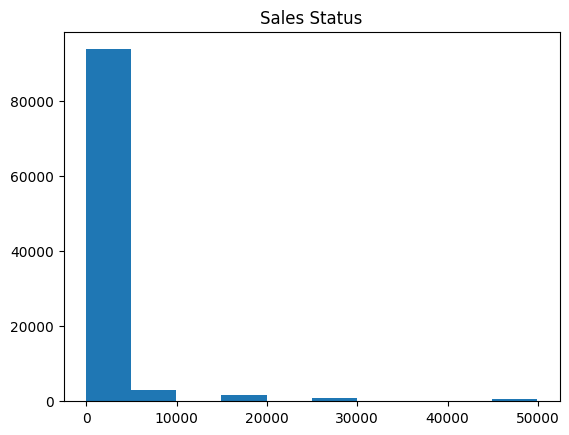

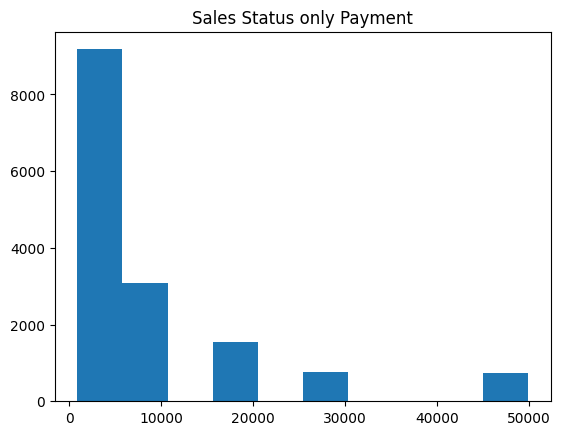

In [10]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
SalesLog = pd.read_csv('Sales.csv')
SalesLog

SalesLog.info()
SalesLog['Payment'].sum()

plt.hist(SalesLog['Payment'])
plt.title('Sales Status')
plt.show()

Sales = SalesLog[SalesLog['Payment']!=0]

plt.hist(Sales['Payment'])
plt.title('Sales Status only Payment')
plt.show()

Sales['Payment'].describe()

plt.boxplot(Sales['Payment'])
plt.title('Payment Box Plot')
plt.show()

Sales['Payment'].value_counts()/len(Sales['Payment'])

SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]
SalesLog['Payment'].groupby(SalesLog['Month']).sum()

temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

Sales02 = SalesLog[(SalesLog['Month'] == '2022-02')& (SalesLog['Payment'] != 0)]

Sales02.reset_index(drop=True)

temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show()